<h3 style = 'color:orange'> Linear Regression using sklearn model, Grid search, Ordinay Least Square</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("sem_23.xlsx", sheet_name='Sheet2')

<h4 style = 'color:yellow'> Basic EDA </h4>

In [5]:
df.dtypes

CGPA_2    float64
CGPA_3    float64
dtype: object

<Axes: >

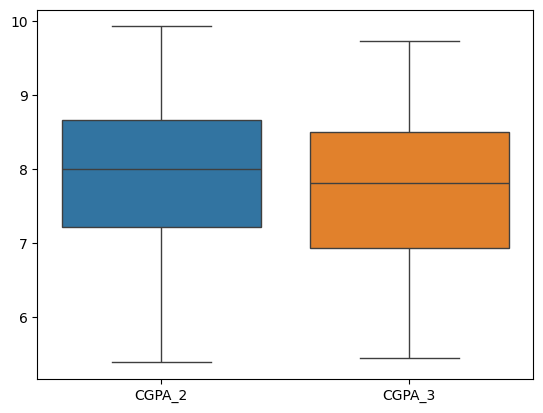

In [9]:
sns.boxplot(df)

In [10]:
df.describe()

,CGPA_2,CGPA_3
count,159.000000,159.000000
mean,7.910503,7.755472
std,0.972116,0.951327
min,5.380000,5.440000
25%,7.220000,6.935000
50%,8.000000,7.810000
75%,8.670000,8.500000
max,9.930000,9.730000


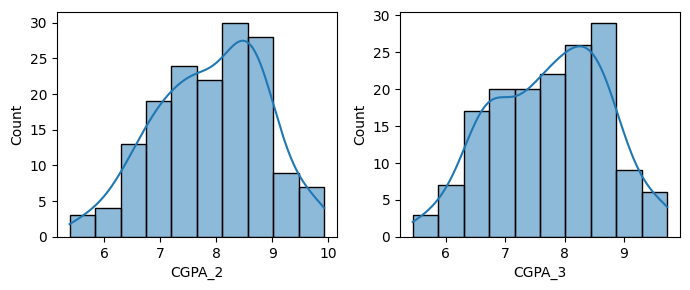

In [33]:
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(df["CGPA_2"],bins = 10,  kde = True, label = "1")
plt.subplot(1,2,2)
sns.histplot(df["CGPA_3"],bins = 10, kde = True, label = "2")

plt.tight_layout()
plt.show()

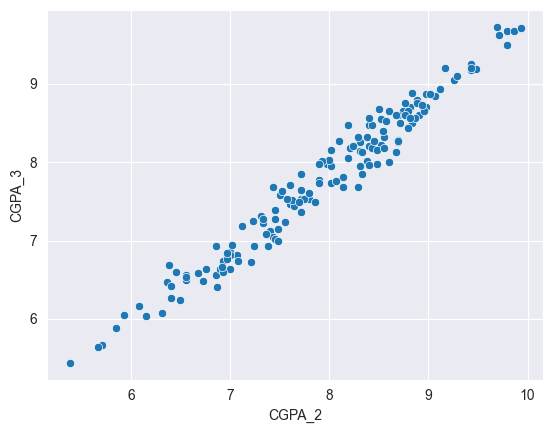

In [46]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x = "CGPA_2", y = "CGPA_3")

plt.show()

In [49]:
np.corrcoef(df["CGPA_2"], df["CGPA_3"])

array([[1.        , 0.98234755],
       [0.98234755, 1.        ]])

<h4 style = 'color:white'> Linear Regression Eqation -> CGPA_3 = bo + b1(CGPA_2) </h4>
Y   = bo + b1X

<h4 style = 'color:red'>1. Sklearn model implementation </h4>

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
x = df[["CGPA_2"]]
y = df["CGPA_3"]

In [52]:
skmodel = LinearRegression()
skmodel.fit(x,y)

LinearRegression()

In [ ]:
skmodel.score(x, y)  # R^2 score

0.9650067134704251

In [68]:
bo = skmodel.intercept_
b1 = skmodel.coef_[0]
print(f"CGPA_3 = {bo: .2f} + {b1 : .2f} * CGPA_3")

CGPA_3 =  0.15 +  0.96 * CGPA_3


In [78]:
x = np.linspace(5, 11, 50)
y = bo + b1*x

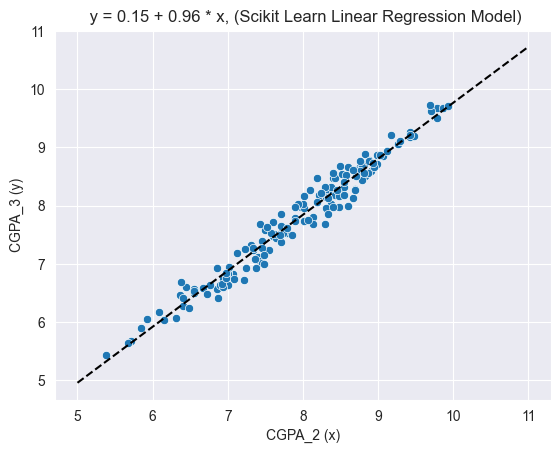

In [93]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x = "CGPA_2", y = "CGPA_3")
plt.plot(x, y, 'k--')
plt.title(" y = 0.15 + 0.96 * x, (Scikit Learn Linear Regression Model)")
plt.xlabel("CGPA_2 (x)")
plt.ylabel("CGPA_3 (y)")
plt.show()

In [84]:
y_pred = skmodel.predict(df[["CGPA_2"]])
error = df["CGPA_3"] - y_pred

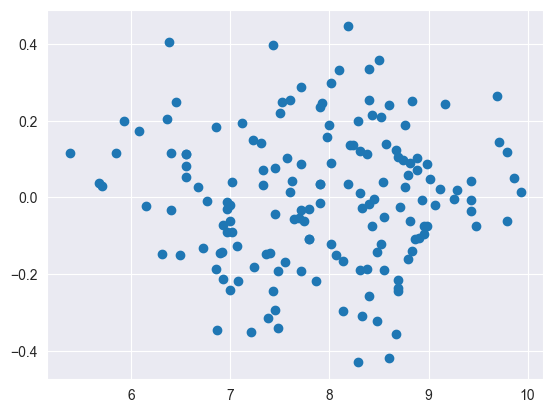

In [6]:
plt.scatter(df["CGPA_2"], error)
plt.show()

<br>

<h4 style = 'color:red'>2. Ordinary Least Square (Linear Algebra Method)</h4>

##### (beta) B = (X.T @ X)^-1 @ X.T

In [21]:
ones = np.ones((df.shape[0], 1))
x_variable = df["CGPA_2"].values.reshape(-1,1)
X = np.concatenate((ones, x_variable), axis = 1)
Y = df["CGPA_3"].values.reshape(-1,1)

In [25]:
X_left_inverse = np.linalg.inv((X.T) @ X) @ (X.T)   # Moore-Penrose pseudoinverse

In [ ]:
beta = X_left_inverse @ Y   # beta -> [[bo], [b1]] estimated parameters

In [41]:
bo = beta[0,0]
b1 = beta[1,0]
print(f"CGPA_3 = {bo: .2f} + {b1 : .2f} * CGPA_3")

CGPA_3 =  0.15 +  0.96 * CGPA_3


<h4> The estimated parameter here are same as what we found in <br>sklearn Linear Regression Model </h4>

<br>

<h4 style = 'color:red'>3. Grid Search Method </h4>

In [67]:
bo_grid = np.linspace(-5, 5, 50)   
b1_grid = np.linspace(-5, 5, 50)

bo_vals, b1_vals = np.meshgrid(bo_grid, b1_grid)   # making a 2D Grid for parameters bo, b1

In [68]:
ones = np.ones((df.shape[0], 1))
x_variable = df["CGPA_2"].values.reshape(-1,1)
X = np.concatenate((ones, x_variable), axis = 1)
Y_true = df["CGPA_3"].values.reshape(-1,1)

In [69]:
def func_SSE(y_pred):

    SSE = np.sum((y_pred - Y_true)**2)
    return SSE

def y_prediction(beta_array):
    
    y_pred = X @ beta_array
    return y_pred

def grid_SSE(bo, b1):

    beta_array = np.array([bo, b1]).reshape(2,1)
    y_pred = y_prediction(beta_array)
    return func_SSE(y_pred)

In [70]:
f_vec = np.vectorize(grid_SSE)
SSE_vals = f_vec(bo_vals, b1_vals)

In [71]:
min_index = np.argmin(SSE_vals)
i, j = np.unravel_index(min_index, SSE_vals.shape)

bo, b1, estimated_min_SSE = bo_vals[i, j], b1_vals[i, j], SSE_vals[i,j]

In [72]:
print(f"""optimum at : bo = {bo: .2f}, b1 = {b1: .2f}\
, estimated_min_SSE = {estimated_min_SSE: .4f}""") 

print(f"CGPA_3 = {bo: .2f} + {b1 : .2f} * CGPA_3")

optimum at : bo =  0.51, b1 =  0.92, estimated_min_SSE =  5.3399
CGPA_3 =  0.51 +  0.92 * CGPA_3


In [81]:
x = np.linspace(5, 11, 50)
y = bo + b1*x

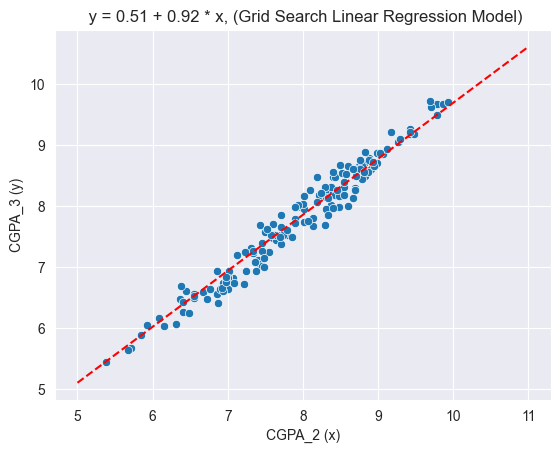

In [2]:
sns.set_style('darkgrid')
sns.scatterplot(data=df, x = "CGPA_2", y = "CGPA_3")
plt.plot(x, y, 'r--')
plt.title(" y = 0.51 + 0.92 * x, (Grid Search Linear Regression Model)")
plt.xlabel("CGPA_2 (x)")
plt.ylabel("CGPA_3 (y)")
plt.show()